# Credit Risk Evaluator

In [45]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [7]:
# Import the data
lend_df = pd.read_csv("resources/lending_data.csv")

lend_df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


In [8]:
#listing out data to check the amount of null counts
lend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

Based on what we already know about the data and what we know about supervised machine learning models, I predict the logistic regression model will perform better. 

## Split the Data into Training and Testing Sets

In [11]:
# Split the data into X_train, X_test, y_train, y_test
y = lend_df["loan_status"].values
X = lend_df.drop("loan_status", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=27)

In [13]:
#scale data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

## Logistic Regression


In [ ]:
# Train a Logistic Regression model and print the model score
classifier = LogisticRegression(max_iter = 1000)
classifier

In [26]:
#print Logistic regression model score
classifier.fit(X_train, y_train)
print(f"Train Model Score: {classifier.score(X_train, y_train)}")
print(f"Test Model Score: {classifier.score(X_test, y_test)}")

Train Model Score: 0.9916597881414225
Test Model Score: 0.9923648369789517


In [27]:
#compute the confusion matrix to help with our analysis
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18656,    85],
       [   63,   580]], dtype=int64)

In [32]:
#assign values of the confusion matrix so we can compute the accuracy of the model
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9923648369789517


In [34]:
#compute the classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18741
           1       0.87      0.90      0.89       643

    accuracy                           0.99     19384
   macro avg       0.93      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



## Random Forest

In [38]:
# Train a Random Forest Classifier model and print the model score
forest = RandomForestClassifier(random_state = 1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {forest.score(X_train_scaled, y_train)}') 
print(f'Testing Score: {forest.score(X_test_scaled, y_test)}')

Training Score: 0.9973001788416563
Testing Score: 0.9922616591002889


## Visualizations for Analysis

<BarContainer object of 7 artists>

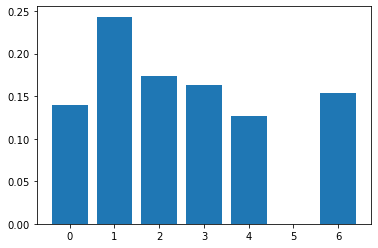

In [48]:
feats = forest.feature_importances_
plt.bar(x=range(len(feats)), height = feats)

Data: Before testing, minimal data cleansing was required as the dataset contained no null values and only integers or floats. A positive trend was observed in the data, which was represented using a histogram. 

Models: After comparing the Logistic Regression Model and the Random Forest Classifier, it was found that the Logistic Regression Model exhibited a higher level of accuracy. Although there wasn't a significant difference between the training and testing scores of both models, the bar chart revealed that Feature 1 performed significantly better than Feature 5. 

Overall: Both models exhibited positive trends, but the Logistic Regression Model performed better than the Random Forest Classifier.